In [ ]:
!pip install nltk

In [ ]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [ ]:
cd /content/drive/MyDrive/AIML_LAB_SEM3

/content/drive/MyDrive/AIML_LAB_SEM3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import json
with open('/content/drive/MyDrive/AIML_LAB_SEM3/intents_short.json', 'r') as f:
    intents = json.load(f)    
intents

{'intents': [{'patterns': ['abdominal pain',
    'abdomen hurts',
    'pain in stomach',
    'pain in abdomen'],
   'tag': 'abdominal_pain'},
  {'patterns': ['abnormal menstruation',
    'heavy period',
    'Heavy flow',
    'Period lasts longer',
    'period painful',
    'strong menstrual pain',
    'Menstrual cramps strong'],
   'tag': 'abnormal_menstruation'},
  {'patterns': ['acid reflux', 'acidity problems', 'heartburn'],
   'tag': 'acidity'},
  {'patterns': ['acute liver failure',
    'liver hurts',
    'pain around liver',
    'Upper right abdomen hurts'],
   'tag': 'acute_liver_failure'},
  {'patterns': ['altered sensorium',
    "can't think clearly",
    'hard to think',
    'unable to concentrate'],
   'tag': 'altered_sensorium'},
  {'patterns': ['anxiety', 'anxious', 'really worried', 'nervous'],
   'tag': 'anxiety'},
  {'patterns': ['back hurts', 'back pain', 'pain in back'],
   'tag': 'back_pain'},
  {'patterns': ['belly hurts',
    'belly pain',
    'pain in belly',
    

In [ ]:
words_all = []
tags = []
Symp_patt = []

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
for intent in intents['intents']:
    tag = intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words_all.extend(w)
        Symp_patt.append( (w, tag) )

In [ ]:
Symp_patt

[(['abdominal', 'pain'], 'abdominal_pain'),
 (['abdomen', 'hurts'], 'abdominal_pain'),
 (['pain', 'in', 'stomach'], 'abdominal_pain'),
 (['pain', 'in', 'abdomen'], 'abdominal_pain'),
 (['abnormal', 'menstruation'], 'abnormal_menstruation'),
 (['heavy', 'period'], 'abnormal_menstruation'),
 (['Heavy', 'flow'], 'abnormal_menstruation'),
 (['Period', 'lasts', 'longer'], 'abnormal_menstruation'),
 (['period', 'painful'], 'abnormal_menstruation'),
 (['strong', 'menstrual', 'pain'], 'abnormal_menstruation'),
 (['Menstrual', 'cramps', 'strong'], 'abnormal_menstruation'),
 (['acid', 'reflux'], 'acidity'),
 (['acidity', 'problems'], 'acidity'),
 (['heartburn'], 'acidity'),
 (['acute', 'liver', 'failure'], 'acute_liver_failure'),
 (['liver', 'hurts'], 'acute_liver_failure'),
 (['pain', 'around', 'liver'], 'acute_liver_failure'),
 (['Upper', 'right', 'abdomen', 'hurts'], 'acute_liver_failure'),
 (['altered', 'sensorium'], 'altered_sensorium'),
 (['ca', "n't", 'think', 'clearly'], 'altered_sensori

In [ ]:
Symp_patt_test = [
    (['ca', "n't", 'think', 'straight'], 'altered_sensorium'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['bloody', 'poop'], 'bloody_stool'),
    (['blurred', 'vision'], 'blurred_and_distorted_vision'),
    (['ca', "n't", 'breathe'], 'breathlessness'),
    (['Yellow', 'liquid', 'pimple'], 'yellow_crust_ooze'),
    (['lost', 'weight'], 'weight_loss'),
    (['side', 'weaker'], 'weakness_of_one_body_side'),
    (['watering', 'eyes'], 'watering_from_eyes'),
    (['brief', 'blindness'], 'visual_disturbances'),
    (['throat', 'hurts'], 'throat_irritation'),
    (['extremities', 'swelling'], 'swollen_extremeties'),
    (['swollen', 'lymph', 'nodes'], 'swelled_lymph_nodes'),
    (['dark', 'under', 'eyes'], 'sunken_eyes'),
    (['stomach', 'blood'], 'stomach_bleeding'),
    (['blood', 'urine'], 'spotting_urination'),
    (['sinuses', 'hurt'], 'sinus_pressure'),
    (['watery', 'from', 'nose'], 'runny_nose'),
    (['have', 'to', 'move'], 'restlessness'),
    (['red', 'patches', 'body'], 'red_spots_over_body'),
    (['sneeze'], 'continuous_sneezing'),
    (['coughing'], 'cough'),
    (['skin', 'patches'], 'dischromic_patches'),
    (['skin', 'bruised'], 'bruising'),
    (['burning', 'pee'], 'burning_micturition'),
    (['hurts', 'pee'], 'burning_micturition'),
    (['Burning', 'sensation'], 'burning_micturition'),
    (['chest', 'pressure'], 'chest_pain'),
    (['pain', 'butt'], 'pain_in_anal_region'),
    (['heart', 'bad', 'beat'], 'palpitations'),
    (['fart', 'lot'], 'passage_of_gases'),
    (['cough', 'phlegm'], 'phlegm'),
    (['lot', 'urine'], 'polyuria'),
    (['Veins', 'bigger'], 'prominent_veins_on_calf'),
    (['Veins', 'emphasized'], 'prominent_veins_on_calf'),
    (['yellow', 'pimples'], 'pus_filled_pimples'),
    (['red', 'nose'], 'red_sore_around_nose'),
    (['skin', 'yellow'], 'yellowish_skin'),
    (['eyes', 'yellow'], 'yellowing_of_eyes'),
    (['large', 'thyroid'], 'enlarged_thyroid'),
    (['really', 'hunger'], 'excessive_hunger'),
    (['always', 'hungry'], 'excessive_hunger'),
]

In [ ]:
len(Symp_patt_test)

43

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

ignore_words = ['?', '!', '.', ',']
words_all = [stemmer.stem(w.lower()) for w in words_all if w not in ignore_words]
words_all = sorted(set(words_all))
words_all

['a',
 'abdomen',
 'abdomin',
 'abnorm',
 'ach',
 'acid',
 'acn',
 'acut',
 'affair',
 'alcohol',
 'all',
 'also',
 'alter',
 'alway',
 'am',
 'anal',
 'and',
 'ankl',
 'annoy',
 'anu',
 'anxieti',
 'anxiou',
 'anyth',
 'appetit',
 'are',
 'arm',
 'around',
 'at',
 'atrophi',
 'attack',
 'back',
 'bad',
 'bag',
 'balanc',
 'beat',
 'befor',
 'behind',
 'belli',
 'between',
 'bigger',
 'blackhead',
 'bladder',
 'bleed',
 'blind',
 'blister',
 'bloat',
 'blood',
 'bloodi',
 'blue',
 'blur',
 'blurri',
 'bodi',
 'breath',
 'breathless',
 'brief',
 'bright',
 'brittl',
 'broken',
 'brown',
 'bruis',
 'bump',
 'burn',
 'burp',
 'butt',
 'ca',
 'calm',
 'caugh',
 'chang',
 'chest',
 'chill',
 'circl',
 'clearli',
 'cold',
 'color',
 'coma',
 'comfort',
 'concentr',
 'congest',
 'constantli',
 'constip',
 'consumpt',
 'contact',
 'continu',
 'cough',
 'cramp',
 'crust',
 'dark',
 'darker',
 'deep',
 'dehydr',
 'dent',
 'depress',
 'diarrhoea',
 'differ',
 'difficulti',
 'dischrom',
 'discomfo

In [ ]:
tags = sorted(set(tags))
tags

['abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sugar

In [ ]:
import numpy as np
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def bag_of_words(tokenized_sentence, words_all):
    tokenized_sentence = [stemmer.stem(w.lower()) for w in tokenized_sentence]

    bag = np.zeros(len(words_all), dtype=np.float32)
    for idx, w in enumerate(words_all):
        if w in tokenized_sentence:
            bag[idx] = 1.0

    return bag

In [ ]:
import numpy as np
from nltk_utils import bag_of_words

sentence = ['hello', 'how', 'are', 'you']
words = ['hi', 'hello', 'I', 'you', 'bye', 'thanks', 'cool']
bag_of_words(sentence, words)

array([0., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
X_train = []
y_train = []

for (pattern, tag) in Symp_patt:
    bag = bag_of_words(pattern, words_all)
    X_train.append(bag)
    
    label = tags.index(tag)
    y_train.append(label) 
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

array([  0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   2,   2,
         2,   3,   3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,
         6,   6,   6,   7,   7,   7,   7,   7,   8,   8,   8,   8,   9,
         9,   9,   9,  10,  10,  10,  10,  11,  11,  11,  12,  12,  12,
        13,  13,  13,  13,  13,  14,  14,  14,  14,  14,  15,  15,  15,
        15,  16,  16,  16,  16,  17,  17,  17,  17,  18,  18,  18,  19,
        19,  20,  20,  20,  20,  20,  21,  21,  21,  23,  23,  23,  23,
        24,  24,  24,  24,  25,  25,  25,  25,  25,  26,  26,  26,  26,
        26,  22,  22,  22,  22,  22,  27,  27,  28,  28,  28,  29,  29,
        30,  30,  30,  31,  31,  31,  31,  32,  32,  32,  32,  33,  33,
        33,  33,  34,  34,  34,  34,  34,  34,  35,  35,  35,  35,  35,
        36,  36,  37,  37,  37,  37,  38,  38,  38,  39,  39,  39,  39,
        39,  40,  40,  40,  40,  41,  41,  41,  41,  42,  42,  42,  42,
        43,  43,  43,  43,  44,  44,  44,  44,  45,  45,  45,  4

In [ ]:
X_test = []
y_test = []

for (pattern, tag) in Symp_patt_test:
    bag = bag_of_words(pattern, words_all)
    X_test.append(bag)
    
    label = tags.index(tag)
    y_test.append(label) 
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
y_test

array([  4,   5,   5,  12,  13,  14, 127, 126, 124, 122, 120, 116, 114,
       110, 108, 106, 104,  98,  93,  92,  90,  25,  26,  32,  16,  17,
        17,  17,  18,  77,  79,  80,  82,  83,  84,  84,  86,  89, 130,
       129,  36,  37,  37])

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
class ChatDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.n_samples = len(X_data)
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return  self.n_samples

In [ ]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU() 
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

In [ ]:
from nnet import NeuralNet
from sklearn.metrics import accuracy_score

batch_size = 8
hidden_size = 8
output_size = len(tags) 
input_size = len(words_all)
learning_rates = [0.01, 0.05, 0.1, 0.15]
num_epochs = 1000

def nn_validation():
    dataset_train = ChatDataset(X_train, y_train)
    
    train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=2)
    
    device = torch.device('cpu') 
    model = NeuralNet(input_size, hidden_size, output_size).to(device)

    loss_train = []
    loss_test = []
    
    for lr in learning_rates:
        # loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.ASGD(model.parameters(), lr=lr)

        print(f"lr: {lr}, train")
        for epoch in range(num_epochs):
            for (words, labels) in train_loader:
                words = words.to(device)
                labels = labels.to(device)

                outputs = model(words)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if (epoch + 1) % (num_epochs / 2) == 0:
                print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

        print(f'final loss = {loss.item():.4f}')
        loss_train.append(loss.item())
        
        y_predicted = []
        
        for x in X_test:
            
            x = x.reshape(1, x.shape[0])
            x = torch.from_numpy(x)

            output = model(x)
            _, predicted = torch.max(output, dim=1)
            y_pred = predicted.item()
            y_predicted.append(y_pred)
            
        
        print("y_predicted:", y_predicted)
        y_predicted = np.array(y_predicted)
        
        loss_test.append(accuracy_score(y_test, y_predicted))
        print()
    
    return loss_train, loss_test

In [ ]:
train_errors, test_errors = nn_validation()

lr: 0.01, train
epoch 500/1000, loss = 1.2850


KeyboardInterrupt: ignored

NameError: ignored

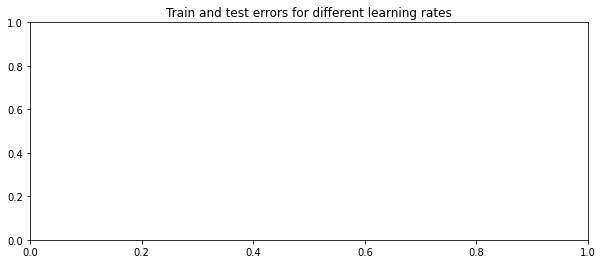

In [ ]:

fig = plt.figure(figsize=(10,4))

plt.title("Train and test errors for different learning rates")
plt.plot(learning_rates, train_errors, c='purple', label='Training error')
plt.plot(learning_rates, test_errors, c='orange', label='Testing error')
plt.legend()
plt.show()

In [ ]:
from nnet import NeuralNet

batch_size = 8
hidden_size = 8
output_size = len(tags) 
input_size = len(words_all)
learning_rate = 0.01
num_epochs = 1000

dataset = ChatDataset(X_train, y_train)
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

device = torch.device('cpu') 
model = NeuralNet(input_size, hidden_size, output_size).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(device)
        
        outputs = model(words)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % (num_epochs / 10) == 0:
        print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

print(f'final loss = {loss.item():.4f}')

epoch 100/1000, loss = 4.6206
epoch 200/1000, loss = 4.4320
epoch 300/1000, loss = 3.4388
epoch 400/1000, loss = 1.1830
epoch 500/1000, loss = 1.1316
epoch 600/1000, loss = 0.0665
epoch 700/1000, loss = 0.1112
epoch 800/1000, loss = 0.3138
epoch 900/1000, loss = 0.0283
epoch 1000/1000, loss = 0.0118
final loss = 0.0118


In [ ]:
data = {
    "model_state": model.state_dict(),
    "input_size": input_size,
    "output_size": output_size,
    "hidden_size": hidden_size,
    "all_words": words_all,
    "tags": tags
}

FILE = "/content/drive/MyDrive/AIML_LAB_SEM3/models/data.pth"
torch.save(data, FILE)

In [ ]:
sentence = "My head hurts"
sentence = nltk.word_tokenize(sentence)
X = bag_of_words(sentence, words_all)
X = X.reshape(1, X.shape[0])
X = torch.from_numpy(X)

output = model(X)
_, predicted = torch.max(output, dim=1)
tag = tags[predicted.item()]

probs = torch.softmax(output, dim=1)
prob = probs[0][predicted.item()]

print("prob:", prob)

tag

prob: tensor(0.7645, grad_fn=<SelectBackward0>)


'headache'

In [ ]:
sentence = "I have sore throat"
sentence = nltk.word_tokenize(sentence)
X = bag_of_words(sentence, words_all)
X = X.reshape(1, X.shape[0])
X = torch.from_numpy(X)

output = model(X)
_, predicted = torch.max(output, dim=1)
tag = tags[predicted.item()]

probs = torch.softmax(output, dim=1)
prob = probs[0][predicted.item()]

print("prob:", prob)

tag

prob: tensor(0.9869, grad_fn=<SelectBackward0>)


'throat_irritation'

In [ ]:
import sklearn
import pickle
import pandas as pd


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIML_LAB_SEM3/data/dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,Impetigo,skin_rash,high_fever,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Impetigo,skin_rash,high_fever,blister,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
symptoms = np.concatenate((df.Symptom_1.unique(), df.Symptom_2.unique(), df.Symptom_3.unique(), df.Symptom_4.unique(), 
                          df.Symptom_5.unique(), df.Symptom_6.unique(), df.Symptom_7.unique(), df.Symptom_8.unique(), 
                          df.Symptom_9.unique(), df.Symptom_10.unique(), df.Symptom_11.unique(), df.Symptom_12.unique(), 
                          df.Symptom_13.unique(), df.Symptom_14.unique(), df.Symptom_15.unique(), df.Symptom_16.unique(), 
                          df.Symptom_17.unique()))

In [ ]:
unique_symp = list((set(symptoms)))

In [ ]:
len(unique_symp)

132

In [ ]:
i = 18
for each in unique_symp:
    df.insert(i, each, 0)
    i = i + 1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
df = df.fillna(0)

In [ ]:
for index, row in df.iterrows(): 
    disease_symptoms = [symptom for symptom in list(row)[1:] if symptom != 0]
    for each in disease_symptoms: 
        df.at[index, each] = 1

In [ ]:
df = df.drop(columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 
             'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16'
             , 'Symptom_17'])

In [ ]:
df = df.loc[:, df.columns.notnull()]
df.columns = df.columns.str.replace(' ', '')
df = df.reindex(sorted(df.columns), axis=1)

In [ ]:
list(df.columns)

['Disease',
 'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irr

Symptom Severity data

In [ ]:
description_dis = pd.read_csv("data/symptom_Description.csv")
description_dis['Disease'] = description_dis['Disease'].apply(lambda x: x.lower().strip(" "))

In [ ]:
dis_precaution = pd.read_csv("data/symptom_precaution.csv")
dis_precaution['Disease'] = dis_precaution['Disease'].apply(lambda x: x.lower().strip(" "))

In [ ]:
dis_precaution

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,drug reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,allergy,apply calamine,cover area with bandage,keep a diary,use ice to compress itching
3,hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,gerd,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis a,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) paroymsal positional vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [ ]:
symp_severity= pd.read_csv("data/Symptom-severity.csv")
symp_severity= symp_severity.applymap(lambda s: s.lower().strip(" ").replace(" ", "") if type(s) == str else s)

In [ ]:
labels = df.to_numpy()[:, :1]
examples = df.to_numpy()[:, 1:]
list_of_symptoms = list(df.columns)[1:]

with open('data/list_of_symptoms.pickle', 'wb') as data_file: 
    pickle.dump(list_of_symptoms, data_file)

print(len(labels))
print(len(examples))
print(len(list_of_symptoms))

304
304
131


In [ ]:
symptoms = ['stomach_pain', 'headache'] 
x_test = []

with open('data/list_of_symptoms.pickle', 'rb') as data_file:
    symptoms_list = pickle.load(data_file)

for each in symptoms_list: 
    if each in symptoms:
        x_test.append(1)
    else: 
        x_test.append(0)

x_test = np.asarray(x_test) 

In [ ]:
def cross_validation(X_train, y_train, X_test, y_test, model_name, parameter_range=50): 
    train_errors = []
    test_errors = []
    
    parameters = np.linspace(1, parameter_range, parameter_range, dtype=int)
    
    for parameter in parameters: 
        if model_name == 'knn':            
            model = KNeighborsClassifier(n_neighbors=parameter, metric='cosine')
        elif model_name == 'logreg':
            model = LogisticRegression(solver='liblinear', C=1/(parameter*20))
        elif model_name == 'dctree':
            model = DecisionTreeClassifier(splitter='random', max_depth=parameter)
        elif model_name =='svm': 
            model = SVC(C=1/(parameter*10))
            
        model.fit(X_train, y_train)
        learning_error = 1 - model.score(X_train, y_train) 
        testing_error = 1 - model.score(X_test, y_test)
        train_errors.append(learning_error)
        test_errors.append(testing_error)
    
    if model_name == 'logreg':
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*20)
    elif model_name == 'svm': 
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*10)
    else: 
        best_parameter_value = parameters[np.argmin(test_errors)]
    
    return parameters, best_parameter_value, train_errors, test_errors

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, metric='cosine')
X_train, X_test, y_train, y_test = train_test_split(examples, labels.ravel(), test_size=0.2)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=6)

In [ ]:
disease = knn.predict(x_test.reshape(1,-1))[0]
print(disease)

Hypertension 


In [ ]:
knn.score(X_test, y_test)

0.819672131147541

In [ ]:

description = description_dis.loc[description_dis['Disease'] == disease.strip(" ").lower(), 'Description'].iloc[0]
print(description)

precaution = dis_precaution[dis_precaution['Disease'] == disease.strip(" ").lower()]
sentence = 'Precautions: ' + precaution.Precaution_1.iloc[0] + ", " + precaution.Precaution_2.iloc[0] + ", " + precaution.Precaution_3.iloc[0] + ", " + precaution.Precaution_4.iloc[0]
print(sentence)

Hypertension (HTN or HT), also known as high blood pressure (HBP), is a long-term medical condition in which the blood pressure in the arteries is persistently elevated. High blood pressure typically does not cause symptoms.
Precautions: meditation, salt baths, reduce stress, get proper sleep


In [ ]:
symptoms = ['stomach_pain', 'headache', 'coma'] 
severity = []

for each in symptoms: 
    severity.append(symp_severity.loc[symp_severity['Symptom'] == each.lower().strip(" ").replace(" ", ""), 'weight'].iloc[0])

if np.mean(severity) > 4 or np.max(severity) > 5:
    print("Considering your symptoms are severe, and MedicBot isn't a real doctor, you should consider talking to one. :)")

Considering your symptoms are severe, and MedicBot isn't a real doctor, you should consider talking to one. :)


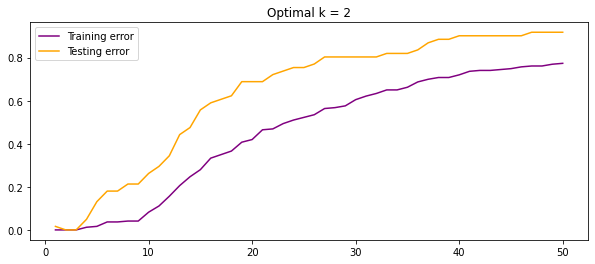

In [ ]:
k_range = 10

fig = plt.figure(figsize=(10,4))


k, best_k, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='knn')
plt.title(f"Optimal k = {best_k}")
plt.plot(k, train_errors, c='purple', label='Training error')
plt.plot(k, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter='random', max_depth=100)

dc_tree = clf.fit(X_train, y_train)
dc_tree.predict(x_test.reshape(1,-1))

array(['GERD'], dtype=object)

In [ ]:
dc_tree.score(X_test, y_test)

0.7377049180327869

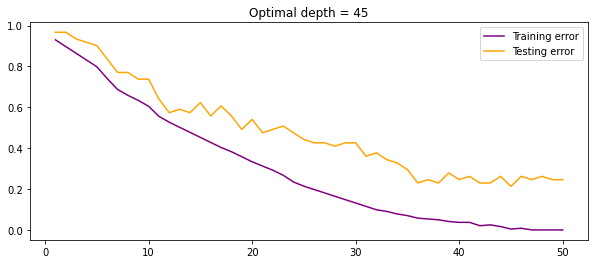

In [ ]:
fig = plt.figure(figsize=(10,4))

depth, best_depth, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='dctree')
plt.title(f"Optimal depth = {best_depth}")
plt.plot(depth, train_errors, c='purple', label='Training error')
plt.plot(depth, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=0.05)

logreg.fit(X_train, y_train)
logreg.predict(x_test.reshape(1,-1))

array(['GERD'], dtype=object)

In [ ]:
print(logreg.score(X_test, y_test))

0.8852459016393442


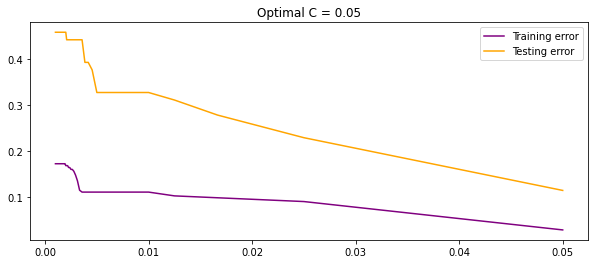

In [ ]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='logreg')
c_reg = []
for each in c: 
    c_reg.append(1/(each*20))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(C=0.3)
svm.fit(X_train, y_train)
svm.predict(x_test.reshape(1,-1))

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [ ]:
print(svm.score(X_test, y_test))

0.7049180327868853


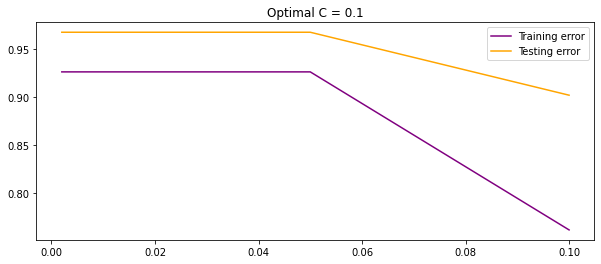

In [ ]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='svm')
c_reg = []
for each in c: 
    c_reg.append(1/(each*10))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()